# 4.10 IC Initial Profile and  Key Business Questions

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Profiling Variable: Age and Gender <br>

 > 04.01 Distribution of Profiles <br>
 > 04.02 Descripting Statistics for each profiled segment <br>
 > 04.03 Relationship with profiles and regions / departments <br>
 >> 04.03.01 Relationship with profiles and departments <br>
 >> 04.03.02 Relationship with profiles and regions

 

## 01 Import Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl')) 

## 03 Data Checks

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [5]:
df.shape

(30964564, 32)

## 04 Profiling Variable: Age and Gender

I am going to create a profile based on age and gender. These two variables drive most of the other profile variables in the dataset including timing of grocery orders and what is ordered as well as variables such as number of dependents, family, status, and income. <br>
I am going to create a variable named cust_profile with the following categories: <br>
- Early Adult Female (ages 18 - 25)
- Early Adult Male (ages 18 - 25)
<br>
- Young Female (ages 26 - 39)
- Young Male (ages 26 - 39)
<br>
- Middle Female (ages 40 - 59)
- Middle Male (ages 40 - 59)
<br>
- Older Female (ages 60 - 81)
- Older Male (ages 60 - 81)

I would love to do a statistical analysis to see whether these categories actually have statistically different spending habits! 

In [6]:
# Create profile variable for Early Adults
df.loc[(df['age'] <= 25) & (df['gender'] == 'Female'),'profile_flag'] = "1F Early Adult Female"
df.loc[(df['age'] <= 25) & (df['gender'] == 'Male'),'profile_flag'] = "1M Early Adult Male"

In [7]:
# Create profile variable for Young
df.loc[(df['age'] >= 26) & (df['age'] <=39) & (df['gender'] == 'Female'),'profile_flag'] = "2F Young Female"
df.loc[(df['age'] >= 26) & (df['age'] <=39) & (df['gender'] == 'Male'),'profile_flag'] = "2M Young Male"

In [8]:
# Create profile variable for Middle
df.loc[(df['age'] >= 40) & (df['age'] <=59) & (df['gender'] == 'Female'),'profile_flag'] = "3F Middle Female"
df.loc[(df['age'] >= 40) & (df['age'] <=59) & (df['gender'] == 'Male'),'profile_flag'] = "3M Middle Male"

In [9]:
# Create profile variable for Young
df.loc[(df['age'] >= 60) & (df['gender'] == 'Female'),'profile_flag'] = "4F Older Female"
df.loc[(df['age'] >= 60) & (df['gender'] == 'Male'),'profile_flag'] = "4M Older Male"

In [11]:
# Check counts
df['profile_flag'].value_counts(dropna = False)

4M Older Male            5305784
4F Older Female          5268720
3M Middle Male           4892355
3F Middle Female         4832595
2M Young Male            3405792
2F Young Female          3394800
1M Early Adult Male      1982809
1F Early Adult Female    1881709
Name: profile_flag, dtype: int64

### 04.01 Distribution of Profiles

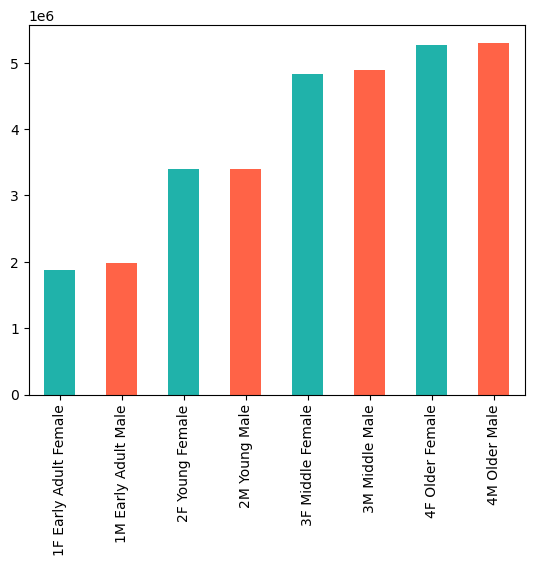

In [12]:
# Bar graph by profiled segment
bar_profile = df['profile_flag'].value_counts().sort_index().plot.bar(color = ['lightseagreen', 'tomato', 'lightseagreen', 'tomato', 'lightseagreen', 'tomato', 'lightseagreen', 'tomato'])

In [13]:
# Export bar chart
bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_profile.png'))

### 04.02 Descripting Statistics for each profiled segment

In [14]:
# Comparing mean, min, max for each profile group
df.groupby('profile_flag').agg({'prices': ['mean','min','max']})

prices           
                           mean  min   max
profile_flag                              
1F Early Adult Female  7.783442  1.0  25.0
1M Early Adult Male    7.786261  1.0  25.0
2F Young Female        7.785757  1.0  25.0
2M Young Male          7.783801  1.0  25.0
3F Middle Female       7.781974  1.0  25.0
3M Middle Male         7.801190  1.0  25.0
4F Older Female        7.797162  1.0  25.0
4M Older Male          7.793742  1.0  25.0

It is interesting that the mean prices are approximately the same throughout the sample. Nonetheless, middle age males tend to purchase more expensive items and (though slight), middle age females spend less per item. 

In [15]:
# Comparing the total of prices for each profile group
df.groupby('profile_flag').agg({'prices': ['sum']})

,prices
,sum
profile_flag,
1F Early Adult Female,14643410.6
1M Early Adult Male,15436363.2
2F Young Female,26427007.9
2M Young Male,26506155.0
3F Middle Female,37601819.9
3M Middle Male,38159341.2
4F Older Female,41074398.9
4M Older Male,41345738.9


Early adult females, in total, spend the least, and older men, in total, spend the most. 

In [16]:
df.groupby('profile_flag').agg({'order_number': ['mean','min','max']})

order_number        
                              mean min max
profile_flag                              
1F Early Adult Female    17.726604   1  99
1M Early Adult Male      18.006094   1  99
2F Young Female          17.905348   1  99
2M Young Male            17.825521   1  99
3F Middle Female         17.857707   1  99
3M Middle Male           17.796457   1  99
4F Older Female          18.013526   1  99
4M Older Male            17.603145   1  99

Older men tend to create the fewest orders; whereas, older women tend the create the most

### 04.03 Relationship with profiles and regions / departments

In [17]:
# Always a good idea to check data!
df.head(20)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag,profile_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,2F Young Female


In [18]:
# Check
df.shape

(30964564, 33)

In [19]:
# Check descriptive stats
df.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spend,frequent_orders,age,number_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.060587e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,7.790592e+00,9.443418e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.389341e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.216696e-01,6.005988e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.385130e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.812245e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.224106e+00,1.100000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [20]:
# Check counts
df['profile_flag'].value_counts(dropna = False)

4M Older Male            5305784
4F Older Female          5268720
3M Middle Male           4892355
3F Middle Female         4832595
2M Young Male            3405792
2F Young Female          3394800
1M Early Adult Male      1982809
1F Early Adult Female    1881709
Name: profile_flag, dtype: int64

In [21]:
# Check counts
df['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

In [28]:
# Check counts
df['department_id'].value_counts(dropna = False).sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

#### 04.03.01 Relationship with profiles and departments

In [38]:
crosstab_depts = pd.crosstab(df['department_id'], df['profile_flag'], dropna = False)
crosstab_depts

profile_flag,1F Early Adult Female,1M Early Adult Male,2F Young Female,2M Young Male,3F Middle Female,3M Middle Male,4F Older Female,4M Older Male
department_id,,,,,,,,
1,129652,136238,228388,232525,329307,336658,365132,363831
2,2200,2256,3625,4037,5366,5323,5964,5640
3,68247,71626,123506,122623,176257,176123,191133,191313
4,548774,578952,995236,1005891,1419823,1426479,1537442,1566676
5,9608,9580,17106,15362,22326,23049,25804,21792
6,15723,16651,28622,27850,39802,40895,42481,43967
7,156023,162320,278541,277289,403895,410164,441925,441744
8,5983,6635,9896,9404,14043,15344,15445,16310
9,50997,53201,89905,89396,127567,130968,139630,140472


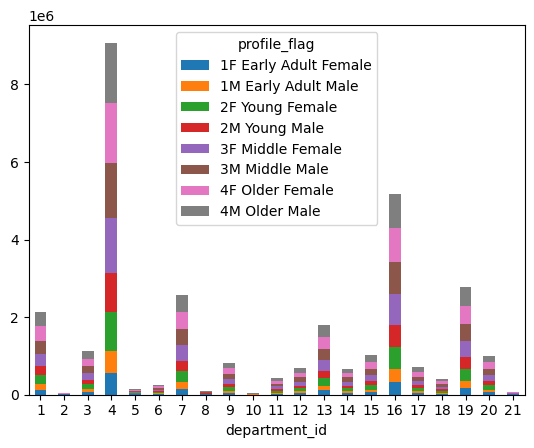

In [39]:
# Create a stacked bar chart of this data.
barplot_depts = crosstab_depts.plot.bar(rot = 0, stacked = True)

In [41]:
# To see this bar chart using percentages, move it to excel and design chart there!
crosstab_depts.to_clipboard()

#### 04.03.02 Relationship with profiles and regions

In [43]:
crosstab_regions = pd.crosstab(df['region'], df['profile_flag'], dropna = False)
crosstab_regions

profile_flag,1F Early Adult Female,1M Early Adult Male,2F Young Female,2M Young Male,3F Middle Female,3M Middle Male,4F Older Female,4M Older Male
region,,,,,,,,
Midwest,433570,464585,820973,763873,1164746,1158323,1218193,1237250
Northeast,321127,358782,589629,602199,824769,883950,904141,980088
South,648396,666593,1128800,1164458,1577245,1604226,1782587,1738834
West,478616,492849,855398,875262,1265835,1245856,1363799,1349612


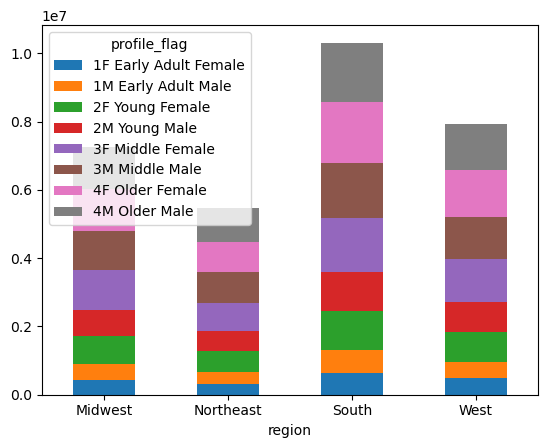

In [44]:
# Create a stacked bar chart of this data.
barplot_regions = crosstab_regions.plot.bar(rot = 0, stacked = True)

In [45]:
# To see this bar chart using percentages, move it to excel and design chart there!
crosstab_regions.to_clipboard()